In [1]:
%pip install -r requirements.txt

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
interest_rate = pd.read_csv('./data/immediate-term.csv')
energy_price = pd.read_csv('./data/energy_price.csv')

In [3]:
interest_rate.head()

,Subject,LOCATION,Country,Interest-Rate,Year,Month
0,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.00,2000,1
1,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.48,2000,2
2,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.50,2000,3
3,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.72,2000,4
4,"Immediate interest rates, Call Money, Interban...",AUS,Australia,5.98,2000,5


In [4]:
energy_price.head()

,Country,LOCATION,Year,Month,Thousand Dollars,Megawatthours,Count,Cents/kWh,Lagged 1 - Cents/kWh,Lagged 2 - Cents/kWh,Lagged 3 - Cents/kWh,Lagged 4 - Cents/kWh,Lagged 5 - Cents/kWh,Lagged 6 - Cents/kWh,Lagged 7 - Cents/kWh,Lagged 8 - Cents/kWh,Lagged 9 - Cents/kWh,Lagged 10 - Cents/kWh,Lagged 11 - Cents/kWh,Lagged 12 - Cents/kWh
0,United States,USA,2022.0,8.0,"25,681,962","160,974,300","140,407,601",15.95,15.46,15.42,14.92,14.77,14.47,13.83,13.72,13.75,14.12,14.11,14.19,13.97
1,United States,USA,2022.0,7.0,"25,531,114","165,125,584","139,780,608",15.46,15.42,14.92,14.77,14.47,13.83,13.72,13.75,14.12,14.11,14.19,13.97,13.87
2,United States,USA,2022.0,6.0,"21,137,852","137,055,267","140,248,613",15.42,14.92,14.77,14.47,13.83,13.72,13.75,14.12,14.11,14.19,13.97,13.87,13.85
3,United States,USA,2022.0,5.0,"16,479,018","110,482,201","138,666,308",14.92,14.77,14.47,13.83,13.72,13.75,14.12,14.11,14.19,13.97,13.87,13.85,13.89
4,United States,USA,2022.0,4.0,"14,537,713","98,449,326","139,496,067",14.77,14.47,13.83,13.72,13.75,14.12,14.11,14.19,13.97,13.87,13.85,13.89,13.76


In [5]:
df = interest_rate.merge(energy_price, on=['Country', 'Year', 'Month'])

In [6]:
#Columns present in the dataset
df.columns

Index(['Subject', 'LOCATION_x', 'Country', 'Interest-Rate', 'Year', 'Month',
       'LOCATION_y', 'Thousand Dollars', 'Megawatthours', 'Count', 'Cents/kWh',
       'Lagged 1 - Cents/kWh', 'Lagged 2 - Cents/kWh', 'Lagged 3 - Cents/kWh',
       'Lagged 4 - Cents/kWh', 'Lagged 5 - Cents/kWh', 'Lagged 6 - Cents/kWh',
       'Lagged 7 - Cents/kWh', 'Lagged 8 - Cents/kWh', 'Lagged 9 - Cents/kWh',
       'Lagged 10 - Cents/kWh', 'Lagged 11 - Cents/kWh',
       'Lagged 12 - Cents/kWh'],
      dtype='object')

In [7]:
#Checking for null values
df.isnull().sum()

Subject                  0
LOCATION_x               0
Country                  0
Interest-Rate            0
Year                     0
Month                    0
LOCATION_y               0
Thousand Dollars         0
Megawatthours            0
Count                    0
Cents/kWh                0
Lagged 1 - Cents/kWh     0
Lagged 2 - Cents/kWh     0
Lagged 3 - Cents/kWh     0
Lagged 4 - Cents/kWh     0
Lagged 5 - Cents/kWh     0
Lagged 6 - Cents/kWh     0
Lagged 7 - Cents/kWh     0
Lagged 8 - Cents/kWh     0
Lagged 9 - Cents/kWh     0
Lagged 10 - Cents/kWh    0
Lagged 11 - Cents/kWh    0
Lagged 12 - Cents/kWh    0
dtype: int64

In [8]:
#Checking datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 271
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Subject                272 non-null    object 
 1   LOCATION_x             272 non-null    object 
 2   Country                272 non-null    object 
 3   Interest-Rate          272 non-null    float64
 4   Year                   272 non-null    int64  
 5   Month                  272 non-null    int64  
 6   LOCATION_y             272 non-null    object 
 7   Thousand Dollars       272 non-null    object 
 8   Megawatthours          272 non-null    object 
 9   Count                  272 non-null    object 
 10  Cents/kWh              272 non-null    float64
 11  Lagged 1 - Cents/kWh   272 non-null    float64
 12  Lagged 2 - Cents/kWh   272 non-null    float64
 13  Lagged 3 - Cents/kWh   272 non-null    float64
 14  Lagged 4 - Cents/kWh   272 non-null    float64
 15  Lagged

In [9]:
#Stats of data
df.describe()

,Interest-Rate,Year,Month,Cents/kWh,Lagged 1 - Cents/kWh,Lagged 2 - Cents/kWh,Lagged 3 - Cents/kWh,Lagged 4 - Cents/kWh,Lagged 5 - Cents/kWh,Lagged 6 - Cents/kWh,Lagged 7 - Cents/kWh,Lagged 8 - Cents/kWh,Lagged 9 - Cents/kWh,Lagged 10 - Cents/kWh,Lagged 11 - Cents/kWh,Lagged 12 - Cents/kWh
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,1.618934,2010.838235,6.441176,11.321213,11.291765,11.264743,11.238787,11.214669,11.191324,11.169338,11.149485,11.129449,11.108640,11.085772,11.063015,11.038713
std,1.867810,6.557405,3.446512,1.853213,1.843001,1.835529,1.826448,1.820962,1.815911,1.812266,1.812589,1.814192,1.816482,1.817583,1.818329,1.820553
min,0.050000,2000.000000,1.000000,7.660000,7.660000,7.660000,7.660000,7.660000,7.660000,7.660000,7.660000,7.660000,7.660000,7.660000,7.660000,7.580000
25%,0.130000,2005.000000,3.000000,9.760000,9.710000,9.557500,9.537500,9.472500,9.382500,9.342500,9.285000,9.265000,9.242500,9.220000,9.217500,9.175000
50%,1.000000,2011.000000,6.000000,11.830000,11.810000,11.795000,11.780000,11.775000,11.760000,11.735000,11.715000,11.705000,11.685000,11.660000,11.650000,11.640000
75%,2.292500,2016.250000,9.000000,12.790000,12.782500,12.765000,12.752500,12.735000,12.722500,12.720000,12.720000,12.712500,12.695000,12.682500,12.680000,12.657500
max,6.540000,2022.000000,12.000000,15.950000,15.460000,15.420000,14.920000,14.770000,14.470000,14.190000,14.190000,14.190000,14.190000,14.190000,14.190000,13.970000


C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

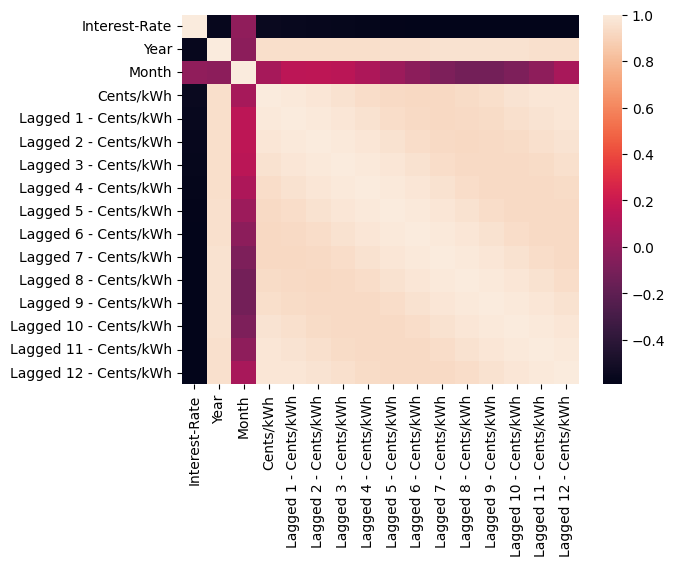

In [10]:
sns.heatmap(df.corr())

array([<AxesSubplot: xlabel='Year,Month'>], dtype=object)

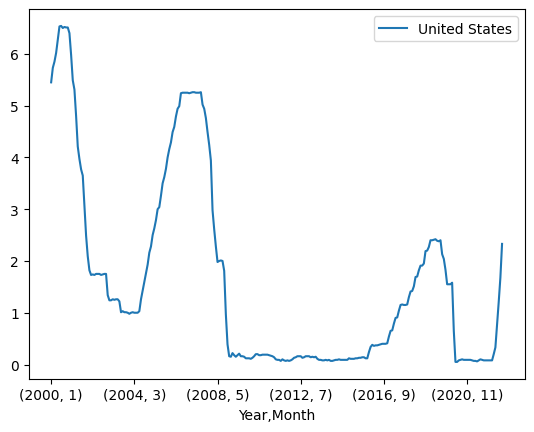

In [14]:
pd.pivot_table(df.reset_index(),
               index=['Year','Month'], columns='Country', values='Interest-Rate'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='Year,Month'>], dtype=object)

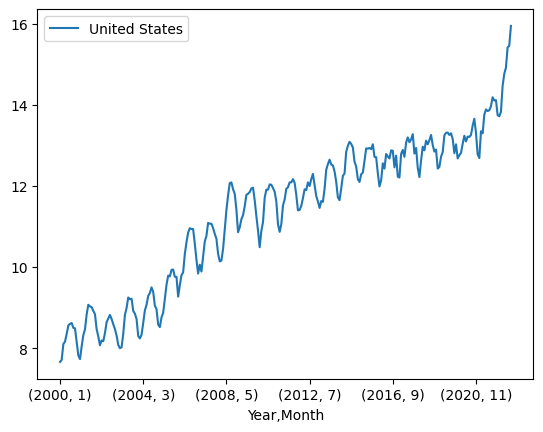

In [15]:
pd.pivot_table(df.reset_index(),
               index=['Year','Month'], columns='Country', values='Cents/kWh'
              ).plot(subplots=True)

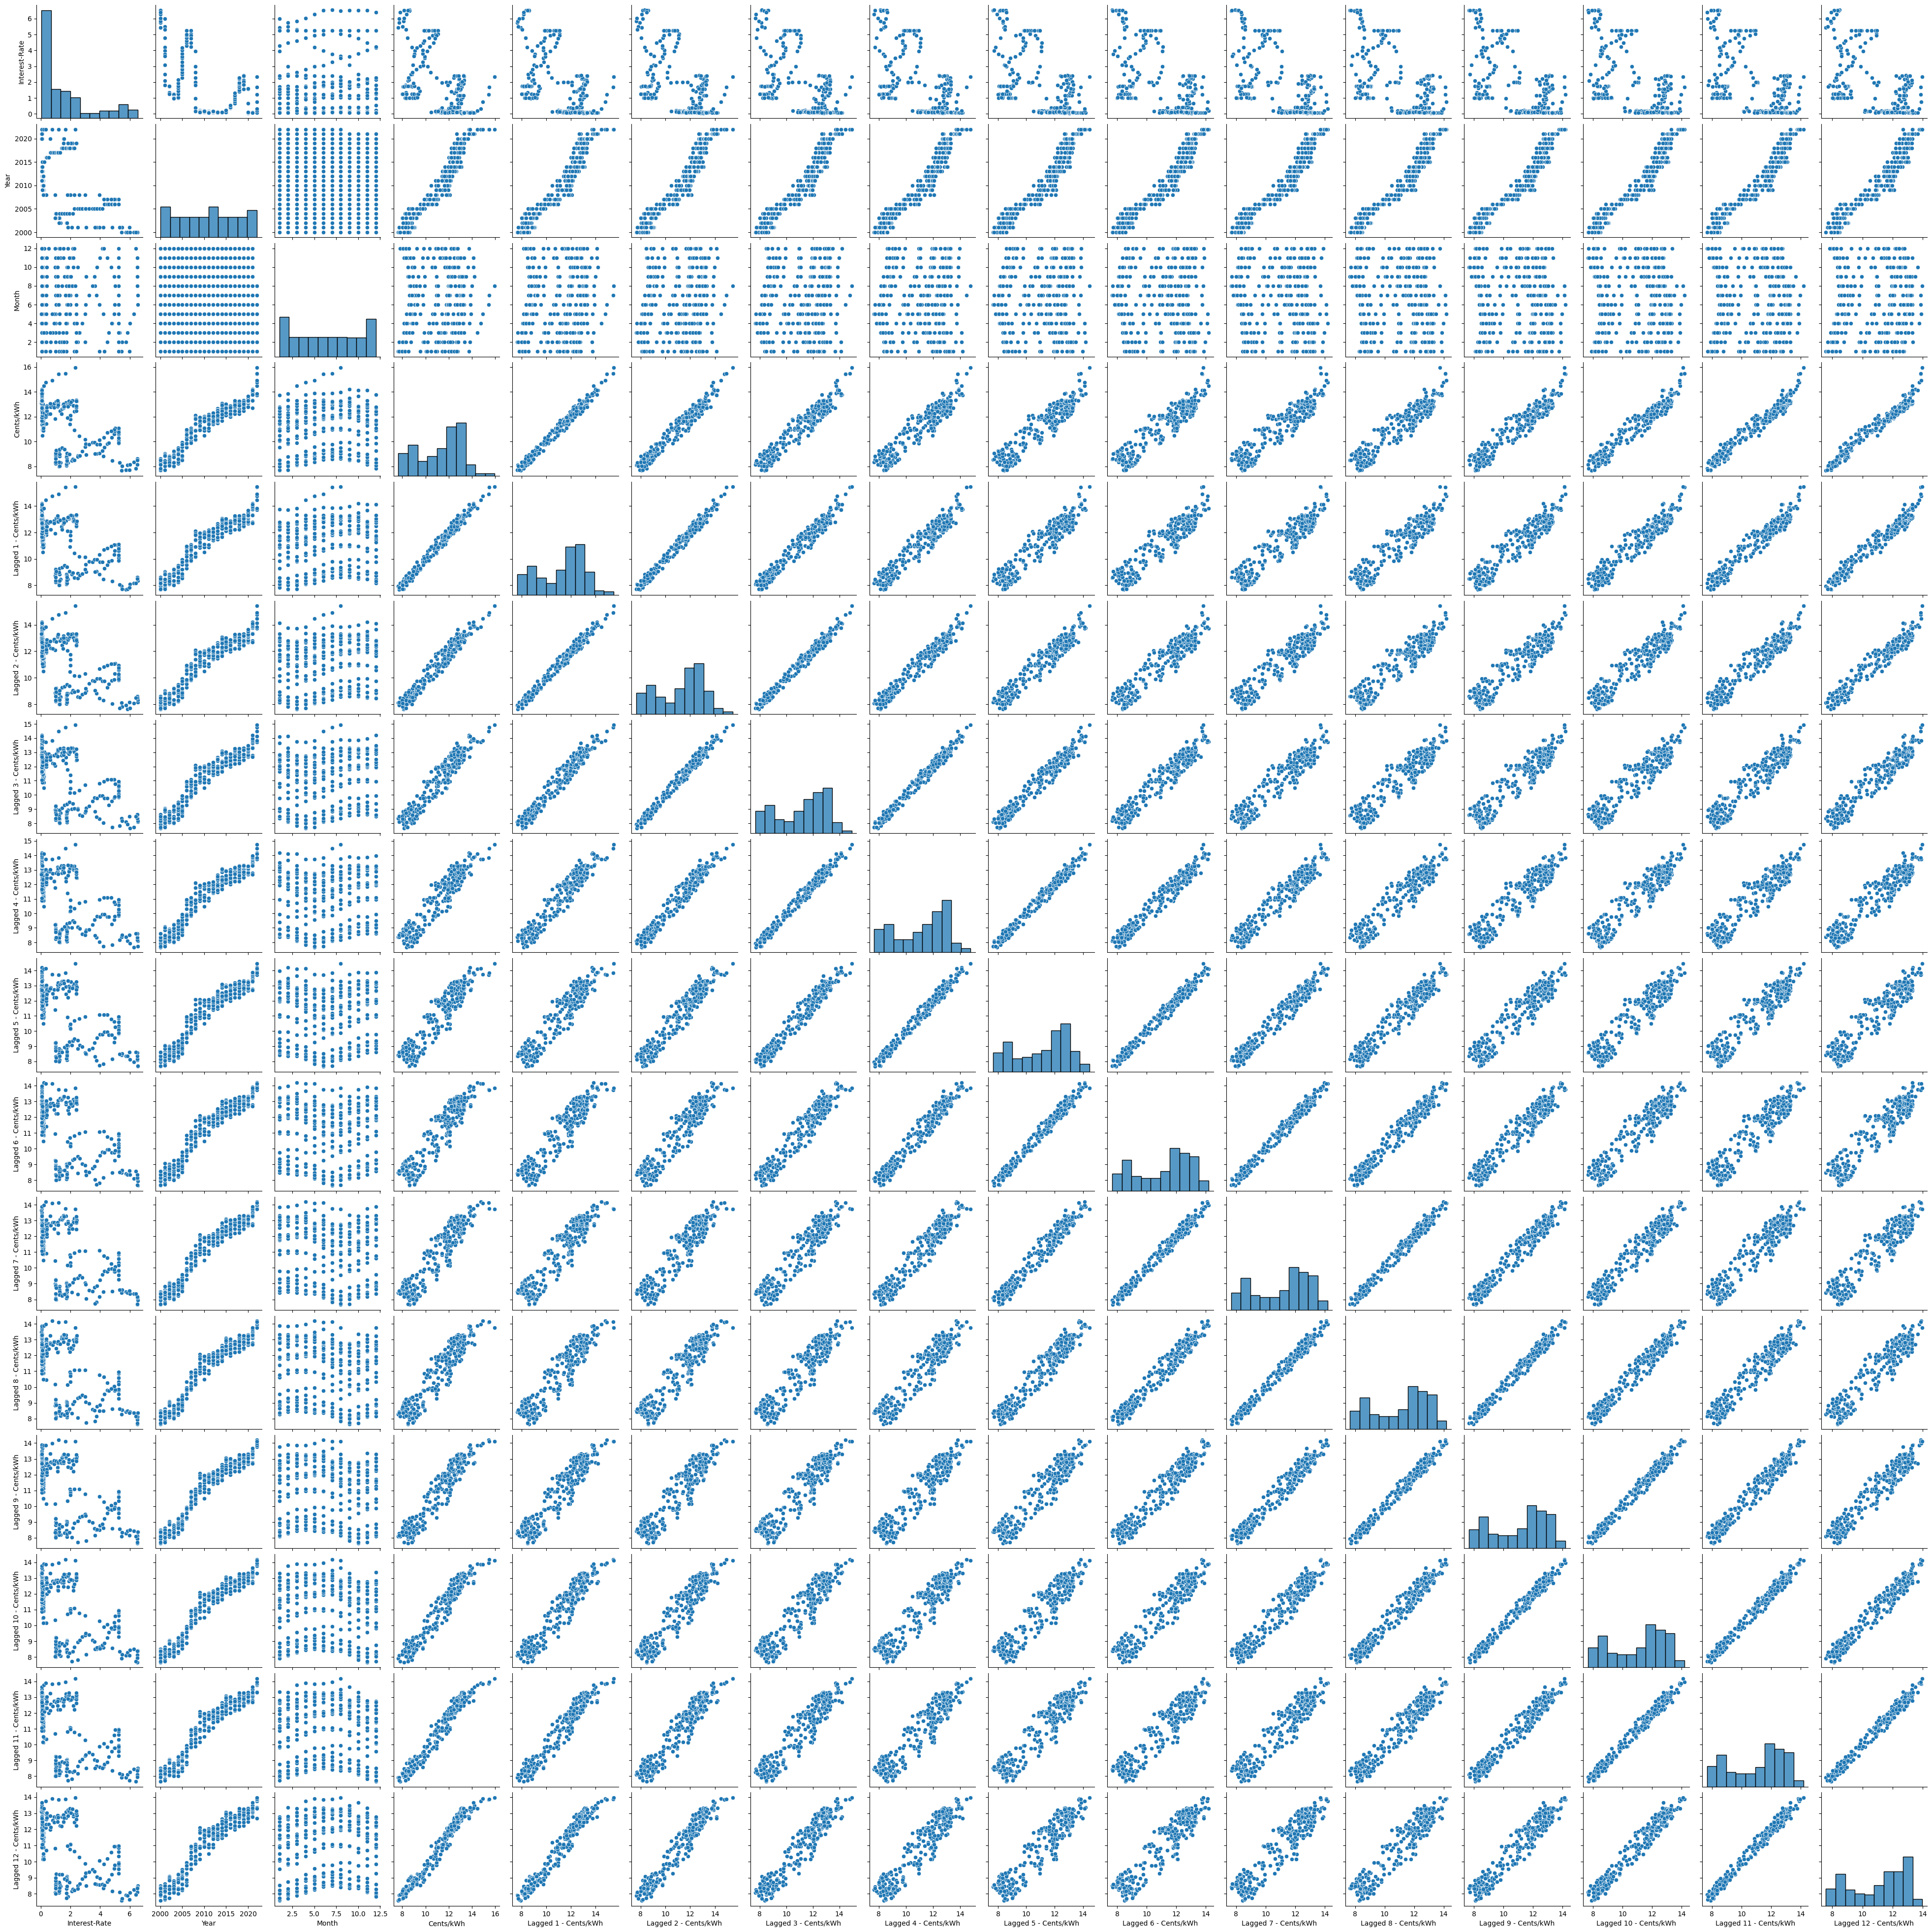

In [12]:
sns.pairplot(df)

<AxesSubplot: xlabel='Country', ylabel='Interest-Rate'>

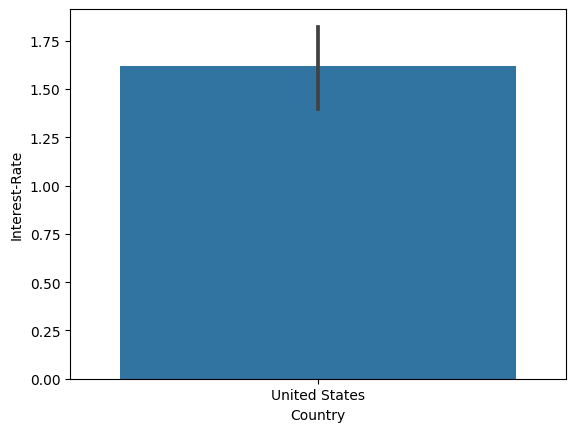

In [13]:
sns.barplot(x="Country",y="Interest-Rate" , data = df)